In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
dataset_path = '/content/_autos - regression.xlsx'
df = pd.read_excel(dataset_path)

# Handle missing values
df.fillna({'vehicleType': 'unknown', 'model': 'unknown', 'notRepairedDamage': 'nein'}, inplace=True)

# Drop irrelevant columns, including datetime columns that may cause dtype issues
df.drop(['dateCrawled', 'name', 'dateCreated', 'lastSeen'], axis=1, inplace=True)

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, columns=['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage', 'model'], drop_first=True)

# Define independent variables and target variable
X = df_encoded.drop(['price'], axis=1)
y = df_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Model assumptions:
# 1. Linear relationship between independent variables and the target variable.
# 2. Homoscedasticity: Constant variance of the residuals.
# 3. Independence of residuals.
# 4. Normality of residuals.
# 5. No multicollinearity among independent variables.

# Note: Further statistical tests (e.g., Durbin-Watson, VIF) may be conducted to check assumptions.


Mean Squared Error: 304974542676.9286
R-squared: -0.04824780621662894


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
import statsmodels.api as sm

# Load the dataset
dataset_path = '/content/bank marketing - logistic.xlsx'
df = pd.read_excel(dataset_path)

# Identify categorical variables and convert them to dummy variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define independent variables and target variable for logistic regression
X_logistic = df_encoded.drop(['y'], axis=1)
y_logistic = df_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert target variable to binary

# Split the data into training and testing sets for logistic regression
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_logistic, y_train_logistic)

# Make predictions for logistic regression
y_pred_logistic = logistic_model.predict(X_test_logistic)

# Evaluate the logistic regression model
logistic_accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
logistic_conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)
logistic_class_report = classification_report(y_test_logistic, y_pred_logistic)

print("Logistic Regression Results")
print("Accuracy:", logistic_accuracy)
print("Confusion Matrix:\n", logistic_conf_matrix)
print("Classification Report:\n", logistic_class_report)

# Define independent variables and target variable for OLS regression
X_ols = df_encoded.drop(['y'], axis=1)
y_ols = df_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Use binary target for consistency

# Add a constant term for OLS regression
X_ols = sm.add_constant(X_ols)

# Fit the OLS model
ols_model = sm.OLS(y_ols, X_ols).fit()

# Print OLS regression results
print("\nOLS Regression Results")
print(ols_model.summary())


Logistic Regression Results
Accuracy: 0.8961325966850828
Confusion Matrix:
 [[787  20]
 [ 74  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.55      0.24      0.34        98

    accuracy                           0.90       905
   macro avg       0.73      0.61      0.64       905
weighted avg       0.87      0.90      0.88       905



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Load the dataset
dataset_path = '/content/_autos - regression.xlsx'
df = pd.read_excel(dataset_path)

# Handle missing values
df.fillna({'vehicleType': 'unknown', 'model': 'unknown', 'notRepairedDamage': 'nein'}, inplace=True)

# Drop irrelevant columns, including datetime columns that may cause dtype issues
df.drop(['dateCrawled', 'name', 'dateCreated', 'lastSeen'], axis=1, inplace=True)

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, columns=['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage', 'model'], drop_first=True)

# Ensure all columns are numeric
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Check for null values after conversion
if df_encoded.isnull().any().any():
    print("Null values found, replacing with 0...")
    df_encoded.fillna(0, inplace=True)

# Define independent variables and target variable
X = df_encoded.drop(['price'], axis=1)
y = df_encoded['price']

# Ensure X and y are numeric
X = X.astype(float)
y = y.astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression using sklearn
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# OLS Regression using statsmodels
X_ols = sm.add_constant(X)  # Add a constant term
ols_model = sm.OLS(y, X_ols).fit()

print("\nOLS Regression Results")
print(ols_model.summary())

Linear Regression Results
Mean Squared Error: 304974542676.9286
R-squared: -0.04824780621662894

OLS Regression Results
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8769
Date:                Mon, 06 Jan 2025   Prob (F-statistic):              0.944
Time:                        14:12:14   Log-Likelihood:            -6.1345e+06
No. Observations:              371527   AIC:                         1.227e+07
Df Residuals:                  371211   BIC:                         1.227e+07
Df Model:                         315                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.97

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
dataset_path = '/content/bank marketing - logistic.xlsx'
df = pd.read_excel(dataset_path)

# Identify categorical variables and convert them to dummy variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define independent variables and target variable
X = df_encoded.drop(['y'], axis=1)
y = df_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert target variable to binary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Note: Further steps like cross-validation and hyperparameter tuning can improve model performance.


Accuracy: 0.8961325966850828
Confusion Matrix:
 [[787  20]
 [ 74  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.55      0.24      0.34        98

    accuracy                           0.90       905
   macro avg       0.73      0.61      0.64       905
weighted avg       0.87      0.90      0.88       905



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


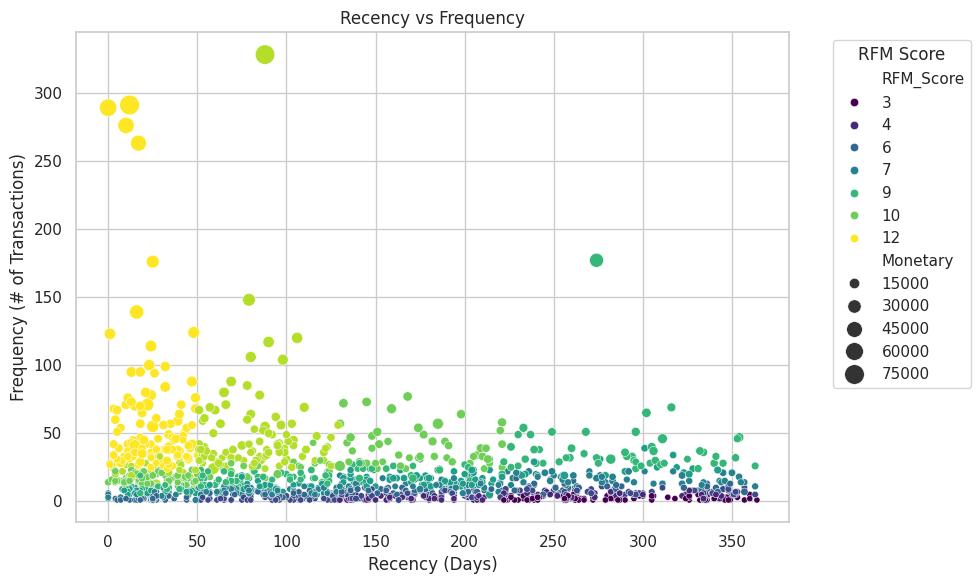

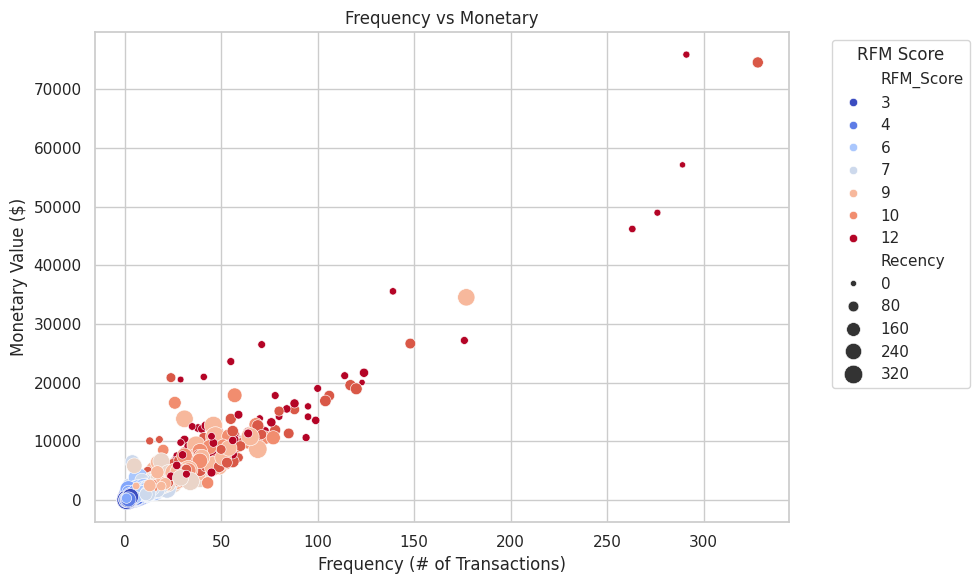

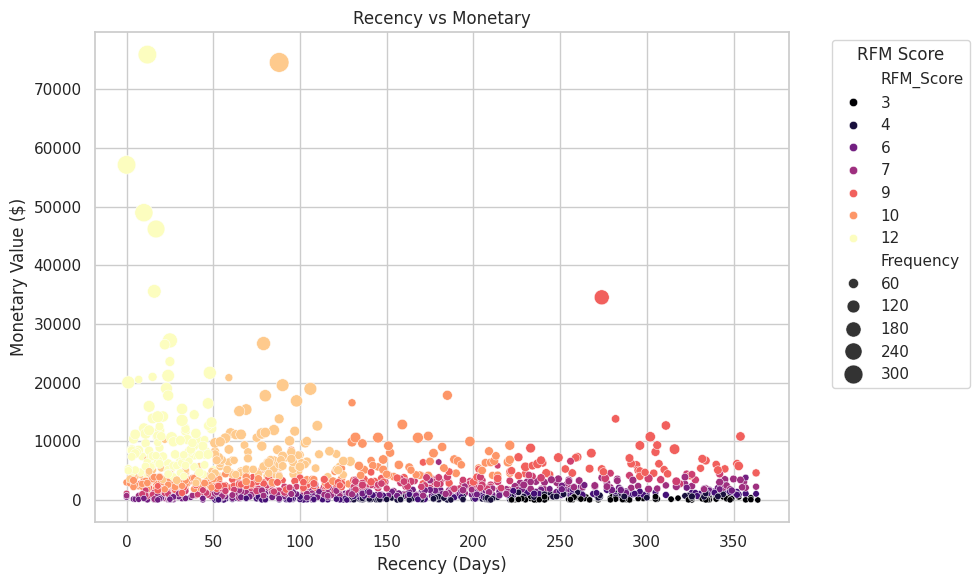

      CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score  \
0          12346      107          1     30.99       3       1       1   
1          12347      282         31  13834.90       1       4       4   
2          12348       73          8   1442.12       3       2       2   
3          12350       17         11   1360.07       4       2       2   
4          12356      107         13   1442.47       3       3       2   
...          ...      ...        ...       ...     ...     ...     ...   
1463       18259      241          3    544.34       1       1       1   
1464       18260       53         19   2363.05       3       3       3   
1465       18269      194          2    101.56       2       1       1   
1466       18277       69          1    298.00       3       1       1   
1467       18283       82         53   6362.77       3       4       4   

     RFM_Segment  RFM_Score           CLV  
0            311          5     28.172727  
1            144       

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Online_Sales_CLV.xlsx'  # Updated file path
df = pd.read_excel(file_path)  # Changed to read_excel

# Check if 'Transaction_Date' column exists
if 'Transaction_Date' not in df.columns:
    raise KeyError("The column 'Transaction_Date' is missing in the dataset.")

# Convert Transaction_Date to datetime
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')

# Check for rows with parsing errors
if df['Transaction_Date'].isnull().any():
    print("Warning: Some dates could not be parsed and were set to NaT. Please verify the data.")
    print(df[df['Transaction_Date'].isnull()])  # Display problematic rows

# Drop rows with invalid dates (optional)
df = df.dropna(subset=['Transaction_Date'])

# Define the current date as a reference for recency calculation
current_date = df['Transaction_Date'].max()

# Calculate total revenue for each transaction
df['Revenue'] = df['Quantity'] * df['Avg_Price']

# --- RFM Analysis ---

# Group data by CustomerID to calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (current_date - x.max()).days,  # Recency
    'Transaction_ID': 'nunique',  # Frequency
    'Revenue': 'sum'  # Monetary
}).reset_index()

# Rename columns for RFM
rfm.rename(columns={
    'Transaction_Date': 'Recency',
    'Transaction_ID': 'Frequency',
    'Revenue': 'Monetary'
}, inplace=True)

# Add RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])  # 4: Most recent, 1: Least recent
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])  # 4: Most frequent
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])  # 4: Highest monetary value

# Combine RFM scores into a single RFM_Segment
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# --- CLV Calculation ---

# Define the discount rate (r) and time horizon (N)
discount_rate = 0.1  # Example: 10% annual discount rate
time_horizon = 12  # Example: Predict CLV for 12 months

# Extract month from Transaction_Date for monthly aggregation
df['Month'] = df['Transaction_Date'].dt.to_period('M')

# Calculate the monthly revenue for each customer
monthly_revenue = df.groupby(['CustomerID', 'Month']).agg({'Revenue': 'sum'}).reset_index()

# Prepare a dataframe to calculate CLV
clv_data = pd.DataFrame({'CustomerID': monthly_revenue['CustomerID'].unique()})

# Function to calculate CLV for each customer
def calculate_clv(customer_id):
    customer_revenue = monthly_revenue[monthly_revenue['CustomerID'] == customer_id]
    total_clv = 0
    for t in range(1, time_horizon + 1):
        # Expected revenue in month t
        if t <= len(customer_revenue):
            expected_revenue = customer_revenue.iloc[t - 1]['Revenue']
        else:
            expected_revenue = 0  # No revenue data for future months
        # Discounted revenue
        total_clv += expected_revenue / ((1 + discount_rate) ** t)
    return total_clv

# Calculate CLV for each customer
clv_data['CLV'] = clv_data['CustomerID'].apply(calculate_clv)

# Merge CLV data with the RFM analysis
rfm_clv = rfm.merge(clv_data, on='CustomerID')

# --- Visualization ---

# Set plot style
sns.set(style="whitegrid")

# Plot Recency vs Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', data=rfm_clv, hue='RFM_Score', palette='viridis', size='Monetary', sizes=(20, 200))
plt.title('Recency vs Frequency')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency (# of Transactions)')
plt.legend(title='RFM Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot Frequency vs Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', data=rfm_clv, hue='RFM_Score', palette='coolwarm', size='Recency', sizes=(20, 200))
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency (# of Transactions)')
plt.ylabel('Monetary Value ($)')
plt.legend(title='RFM Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot Recency vs Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', data=rfm_clv, hue='RFM_Score', palette='magma', size='Frequency', sizes=(20, 200))
plt.title('Recency vs Monetary')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary Value ($)')
plt.legend(title='RFM Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Export to CSV or display
rfm_clv.to_csv('rfm_clv_analysis.csv', index=False)  # Save to CSV
print(rfm_clv)  # Print the result

In [ ]:
import asyncio
import nest_asyncio
import praw
import pandas as pd
from datetime import datetime
from google.colab import userdata

# Install praw if it's not already installed
try:
    import praw
except ModuleNotFoundError:
    print("praw module not found. Installing...")
    !pip install praw
    import praw
try:
    import asyncpraw
except ModuleNotFoundError:
    print("asyncpraw module not found. Installing...")
    !pip install asyncpraw
    import asyncpraw

# Get Reddit API credentials from Colab secrets
try:
    client_id = userdata.get('client_id')
    client_secret = userdata.get('secret_key')
    user_agent = userdata.get('user_agent')
except KeyError as e:
    raise KeyError(f"Missing Reddit API credential: {e}. Please ensure it's set in Colab secrets.")

# Initialize Reddit API client
async def create_async_reddit_instance():
    return asyncpraw.Reddit(
        client_id=client_id,
        client_secret=client_secret,
        user_agent=user_agent
    )

# Define subreddit
subreddit_name = "uberdrivers"


# --- Function to Scrape Posts and Comments ---
async def scrape_reddit_data(subreddit_name, limit=500):
    """
    Scrapes Reddit posts and their comments from a given subreddit using asyncpraw.

    Args:
        subreddit_name (str): The name of the subreddit to scrape.
        limit (int): The number of posts to retrieve.

    Returns:
        pandas.DataFrame: A DataFrame containing the scraped data.
    """
    reddit = await create_async_reddit_instance()
    subreddit = await reddit.subreddit(subreddit_name)

    posts_data = []
    async for submission in subreddit.new(limit=limit):
        await submission.load() # Load the submission before accessing comments
        post_info = {
            'post_id': submission.id,
            'post_title': submission.title,
            'post_author': str(submission.author),
            'post_text': submission.selftext,
            'post_created_utc': datetime.utcfromtimestamp(submission.created_utc),
            'post_url': submission.url,
            'post_upvotes': submission.score,
            'post_num_comments': submission.num_comments,
            'comments': [] # Initialize the list to store comments
        }

        async for comment in submission.comments:
            if isinstance(comment, asyncpraw.models.MoreComments):
                continue
            comment_info = {
                'comment_id': comment.id,
                'comment_author': str(comment.author),
                'comment_text': comment.body,
                'comment_created_utc': datetime.utcfromtimestamp(comment.created_utc),
                'comment_upvotes': comment.score,
                'parent_id': comment.parent_id if hasattr(comment, 'parent_id') else None #Parent id may be null
            }
            post_info['comments'].append(comment_info)

        posts_data.append(post_info)
    await reddit.close()
    return pd.DataFrame(posts_data)



# --- Run Scraper and Store Data ---
async def main():
    print("Scraping data...")
    df = await scrape_reddit_data(subreddit_name, limit=500)
    print("Scraping complete.")

    # Convert post_created_utc to local time
    df['post_created_utc'] = df['post_created_utc'].dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')
    # Convert comment created utc to local time
    for i, row in df.iterrows():
        for comment in row['comments']:
            comment['comment_created_utc'] = datetime.utcfromtimestamp(comment['comment_created_utc'].timestamp()).replace(tzinfo=None)
            comment['comment_created_utc'] = pd.to_datetime(comment['comment_created_utc']).tz_localize('UTC').tz_convert('America/Los_Angeles')

    # --- Display and Save Data ---
    print(df.head())

    # Save data to a CSV file
    file_name = f"{subreddit_name}_reddit_data_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.csv"
    df.to_csv(file_name, index=False)
    print(f"Data saved to {file_name}")


if __name__ == "__main__":
    nest_asyncio.apply()
    asyncio.run(main())

Scraping data...


<ipython-input-28-1c2c622681a2>:94: DeprecationWarning: Using CommentForest as an asynchronous iterator has been deprecated and will be removed in a future version.
  df = await scrape_reddit_data(subreddit_name, limit=500)


Scraping complete.
   post_id                                         post_title  \
0  1hv0dxp                          Uber Mile log and taxes?    
1  1hv04ee  Uber, Lyft spent millions pushing for NYC cong...   
2  1huzp0b  How Uber and Lyft Are Gearing Up for the Robot...   
3  1huz5bh                                 Budget Spreadsheet   
4  1huz25r                 Uber no longer accepts phone calls   

            post_author                                          post_text  \
0  Correct_Register9359  Can I use the Online miles that Uber calculate...   
1            beyonddead                                                      
2          ValleyGrouch                                                      
3      Hot-Manager-1953  How much per mile or percentage of your earnin...   
4          Sea_Top_6796  I tried calling them many times for an issue b...   

           post_created_utc  \
0 2025-01-06 06:34:45-08:00   
1 2025-01-06 06:22:33-08:00   
2 2025-01-06 06:01:59-08:00 

In [ ]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 5.6 MB/s eta 0:00:00
